In [1]:
library("data.table")
library("qtl")

# inputs

In [2]:
genfile =  '../data/20200727_all_wscomposite_binsize1mb_3mbxo_3mbfill.csv'
phefile = '../data/20200727_intersection_phenotypes.csv'

In [3]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir='.',
                    genfile=genfile,
                    phefile = phefile )

Warning message in read.cross.csvs(dir, genfile, phefile, na.strings, genotypes, :
“2 individuals with genotypes but no phenotypes
    913407|910907
”


 --Read the following data:
	 3135  individuals
	 1088  markers
	 7  phenotypes
 --Cross type: f2 


In [4]:
summary(datf2)

    F2 intercross

    No. individuals:    3135 

    No. phenotypes:     7 
    Percent phenotyped: 100 99.9 98 98 99.9 99.9 99.9 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  70.8 
    Genotypes (%):      AA:26.7  AB:46.9  BB:26.4  not BB:0.0  not AA:0.0 

# subset the data to only include Wahlberg F2s

In [5]:
# READ list of individuals
IDs <- read.table('./20201116_all_wahlberg_individs_new_id.csv')

In [6]:
idvec <- IDs[, 'V1']

In [7]:
idvec <- as.double(idvec)

In [8]:
all_individs <- datf2$pheno[,'id'] %in% idvec

In [9]:
#subset
datf2= subset(datf2, ind = all_individs)

In [10]:
summary(datf2)

    F2 intercross

    No. individuals:    839 

    No. phenotypes:     7 
    Percent phenotyped: 100 100 93.4 93.4 100 100 100 

    No. chromosomes:    30 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 29 30 

    Total markers:      1088 
    No. markers:        199 151 112 93 84 61 38 38 32 26 23 22 22 21 18 15 15 13 
                        12 12 10 9 8 8 8 8 8 8 7 7 
    Percent genotyped:  79.4 
    Genotypes (%):      AA:24.5  AB:49.5  BB:25.9  not BB:0.0  not AA:0.0 

# subset data to only include Wahlberg Markers

In [11]:
# load data - which bins have a Wahlberg 2009 marker?
Wahlberg_bins = read.table('../../../../chicken-assoc-vis/data/20201117_all_bins_with_WB_marker.csv', sep = ',')

In [12]:
datf2 <- pull.markers(datf2, Wahlberg_bins$V2 )

Warning message in pull.markers(datf2, Wahlberg_bins$V2):
“Some markers couldn't be found: 0 20-13”


In [13]:
summary(datf2)

    F2 intercross

    No. individuals:    839 

    No. phenotypes:     7 
    Percent phenotyped: 100 100 93.4 93.4 100 100 100 

    No. chromosomes:    28 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 

    Total markers:      326 
    No. markers:        62 48 26 29 16 11 14 6 10 11 8 6 9 6 8 1 7 3 7 9 5 2 3 5 
                        2 5 4 3 
    Percent genotyped:  80.2 
    Genotypes (%):      AA:24.4  AB:49.8  BB:25.8  not BB:0.0  not AA:0.0 

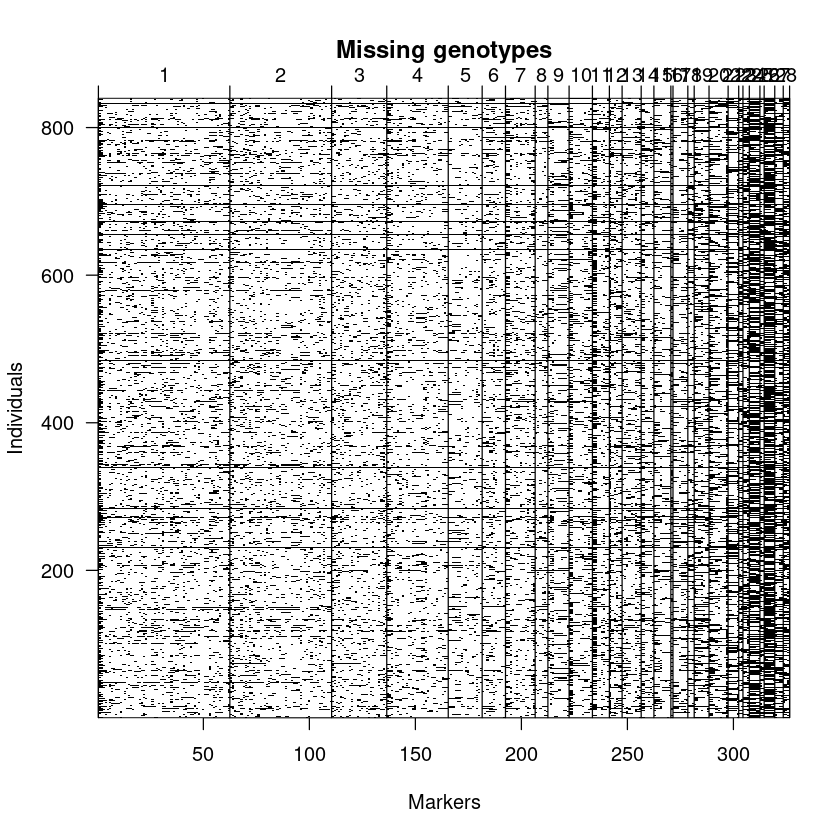

In [14]:
plotMissing(datf2)

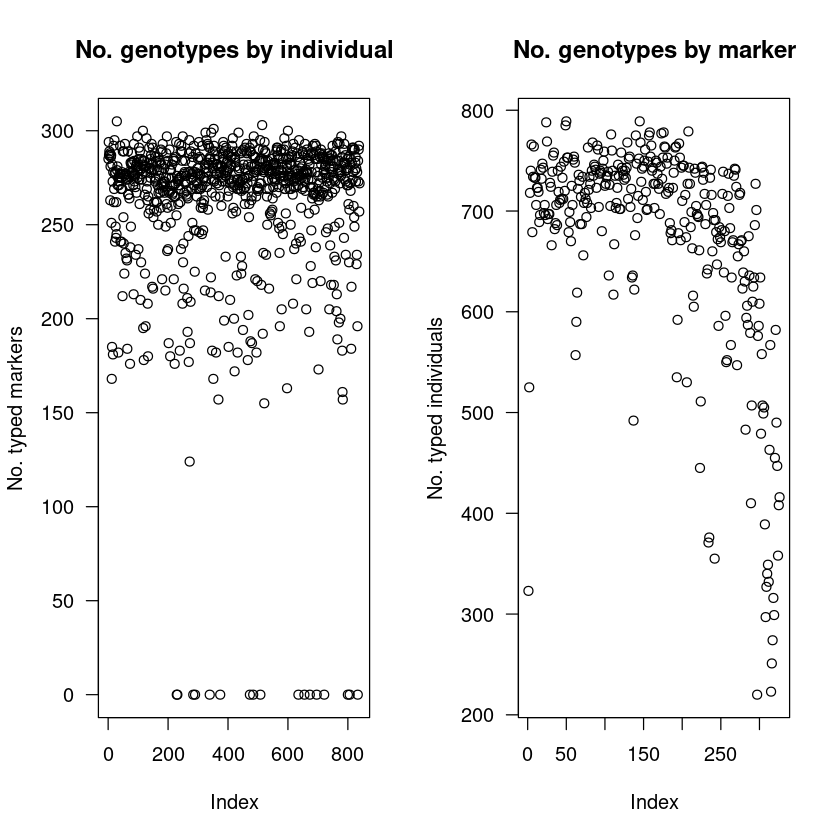

In [15]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [16]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 100])   # changed the filtering here


In [17]:
todrop

character(0)

In [18]:
datf2.1 <- drop.markers(datf2, todrop)

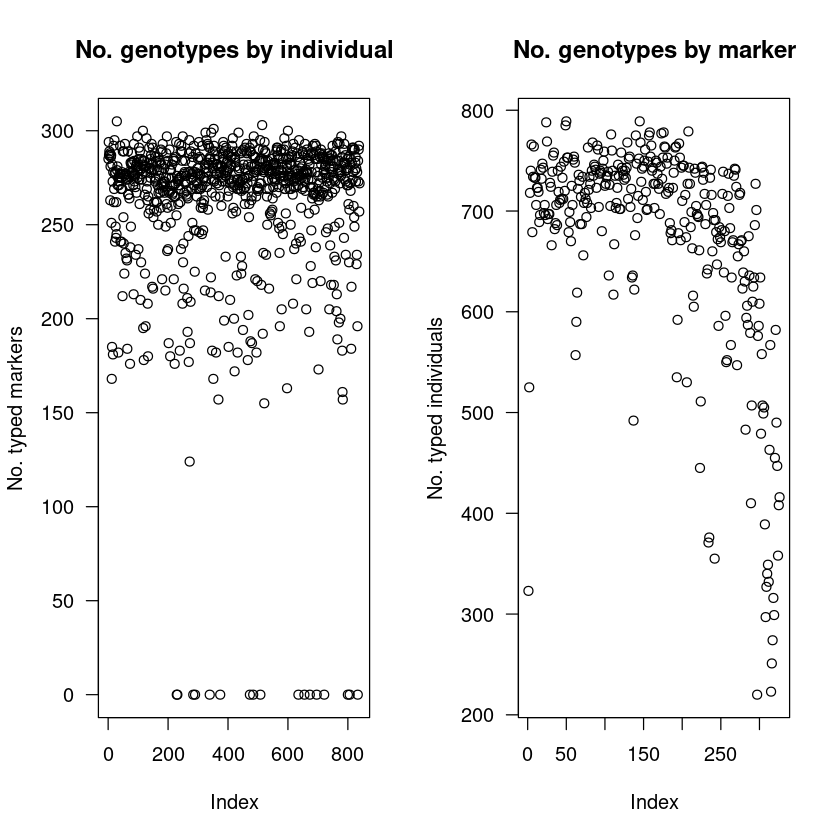

In [19]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [20]:
#datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>50)) # removing all individuals that have less than 5% of all markers
datf2.2 <- datf2.1 # do not remove low marker individuals

In [21]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 839

[1] 839

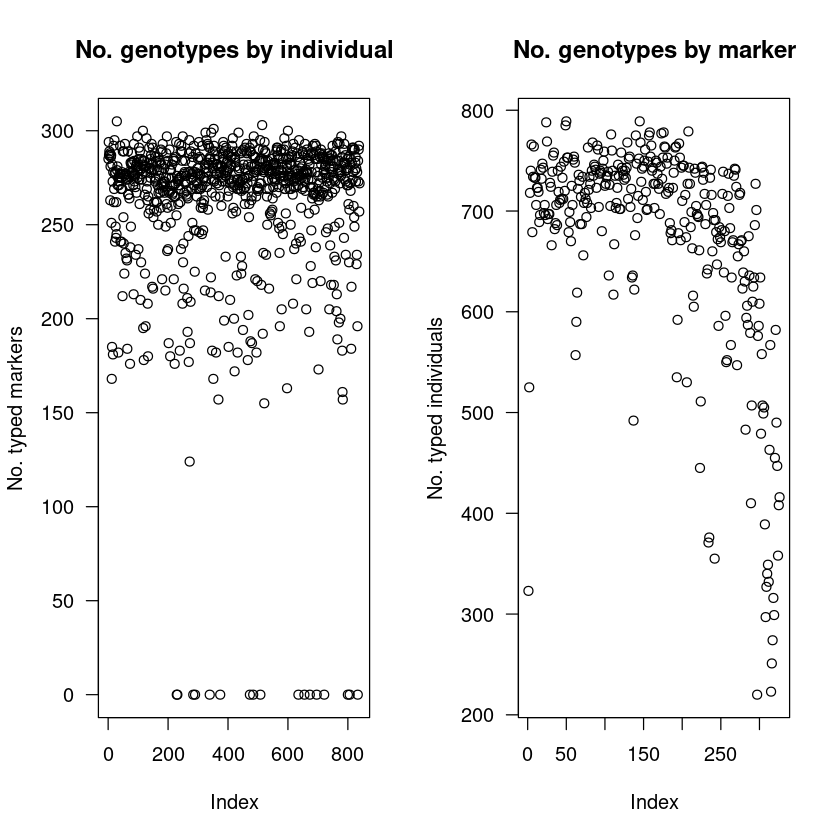

In [22]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [23]:
summary(datf2.2)

    F2 intercross

    No. individuals:    839 

    No. phenotypes:     7 
    Percent phenotyped: 100 100 93.4 93.4 100 100 100 

    No. chromosomes:    28 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 25 26 27 28 

    Total markers:      326 
    No. markers:        62 48 26 29 16 11 14 6 10 11 8 6 9 6 8 1 7 3 7 9 5 2 3 5 
                        2 5 4 3 
    Percent genotyped:  80.2 
    Genotypes (%):      AA:24.4  AB:49.8  BB:25.8  not BB:0.0  not AA:0.0 

In [24]:
cg <- comparegeno(datf2.2)

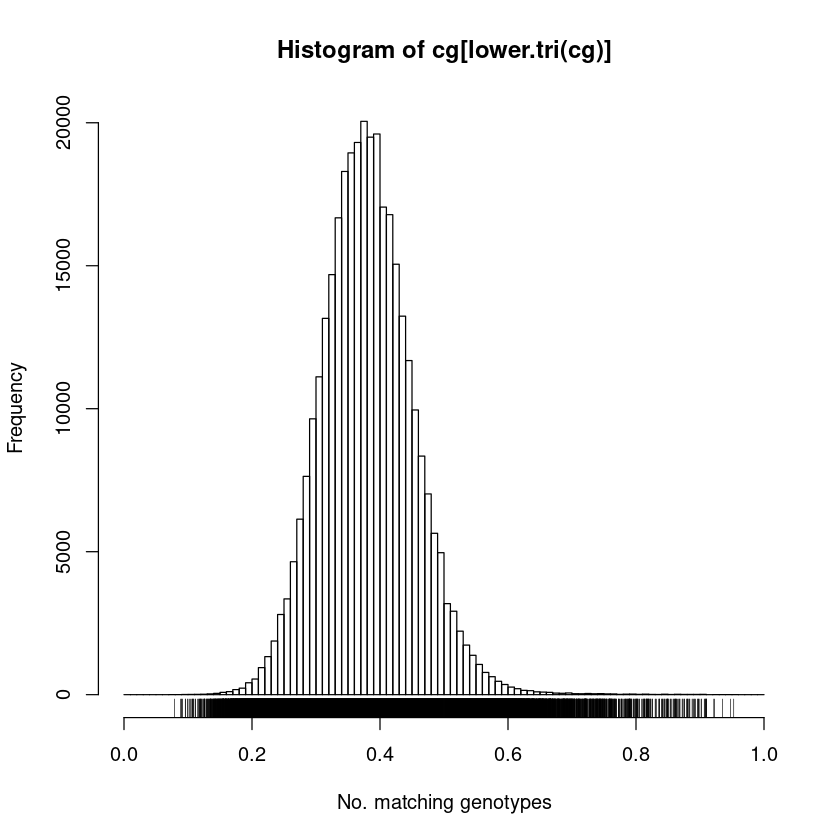

In [25]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [26]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [27]:
wh

,row,col
91202,336,491
128202,468,491
91202,336,498
128602,491,498
59402,7,621
91202,336,621
91202,336,627
128302,498,627
91202,336,770
128602,491,770


In [28]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`1-3`
[1] "1-0" "1-1"

$`4-3`
[1] "4-1"

$`7-3`
[1] "7-1"

$`7-33`
[1] "7-36"

$`10-2`
[1] "10-1"

$`11-1`
[1] "11-0"

$`12-17`
[1] "12-19"

$`14-1`
[1] "14-0"

$`15-3`
[1] "15-2"

$`17-3`
[1] "17-1" "17-2"

$`19-3`
[1] "19-1"

$`19-7`
[1] "19-9"

$`20-3`
[1] "20-0" "20-2"

$`20-7`
[1] "20-10" "20-11"

$`21-3`
[1] "21-0" "21-1" "21-2"

$`23-1`
[1] "23-0"

$`24-2`
[1] "24-0" "24-1"

$`24-5`
[1] "24-6"

$`25-3`
[1] "25-0"

$`26-3`
[1] "26-0" "26-1" "26-2" "26-4"

$`27-3`
[1] "27-2" "27-4" "27-6"

$`28-2`
[1] "28-0"



In [29]:
gt <- geno.table(datf2.2)

In [30]:

#### do not drop markers with segregation distortion


gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
#datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1-159,1,86,131,437,185,0,0,1.247599e-06
1-160,1,86,131,439,183,0,0,8.601703e-07
2-7,2,117,134,370,218,0,0,4.552587e-05
2-8,2,103,133,376,227,0,0,5.135426e-06
5-15,5,89,232,240,278,0,0,4.655847e-23
5-16,5,91,230,238,280,0,0,1.176643e-23
5-18,5,102,226,228,283,0,0,6.616725e-26
5-19,5,112,205,238,284,0,0,2.844613e-23
5-20,5,117,200,241,281,0,0,5.367798e-22


In [31]:
length(todrop)

[1] 28

In [32]:
datf2.3 <- datf2.2

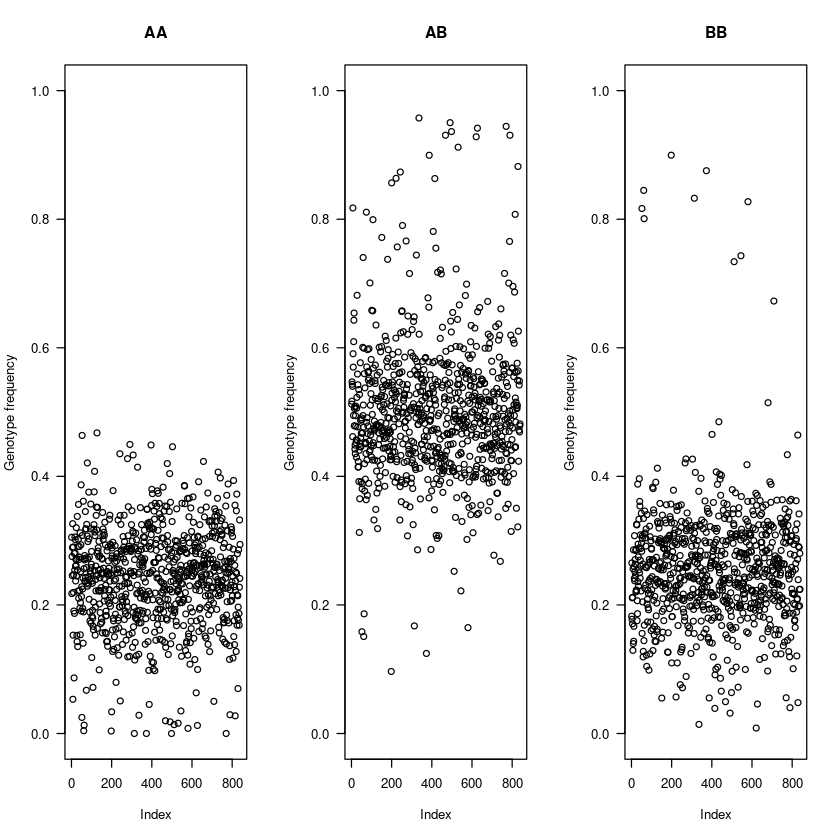

In [33]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

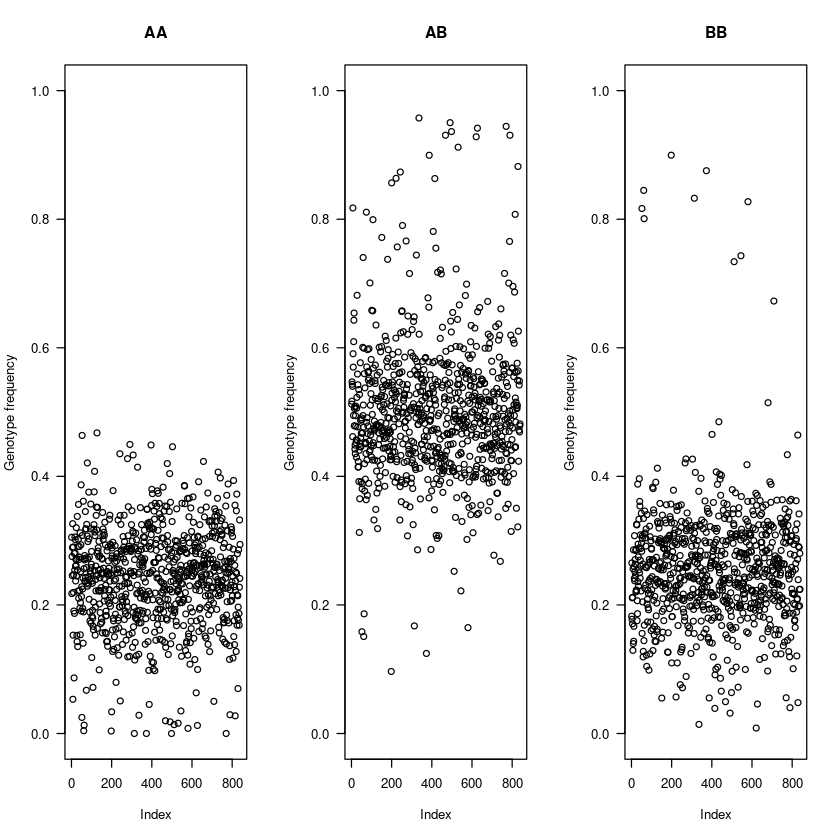

In [34]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [35]:
### do not filter for gfreq

In [36]:
#id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [37]:
#datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [38]:
datf2.4 <- datf2.3

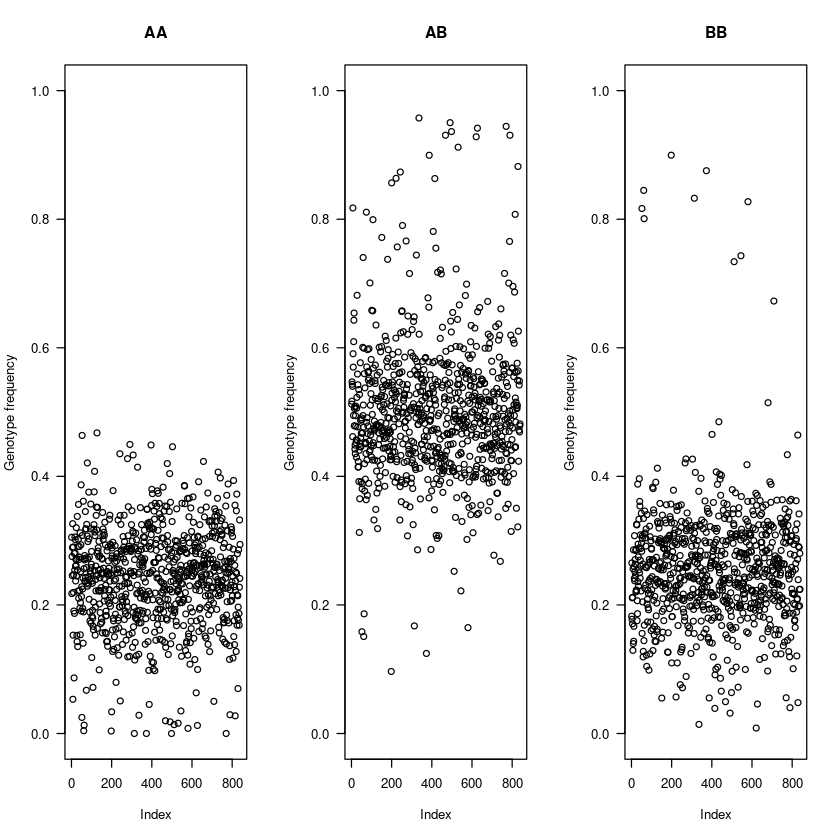

In [39]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [40]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

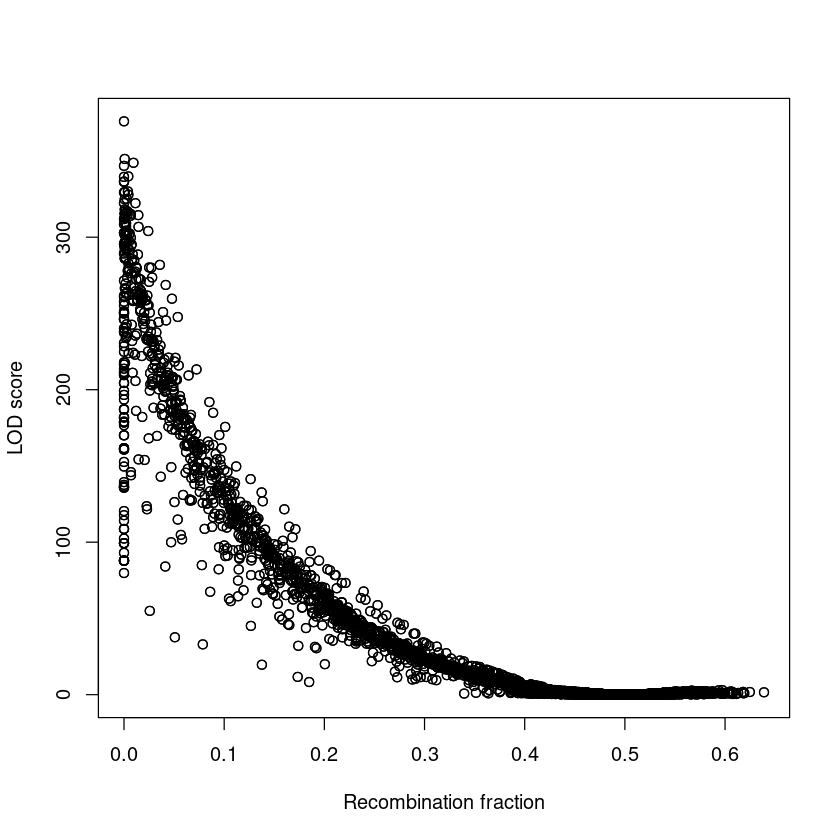

In [41]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

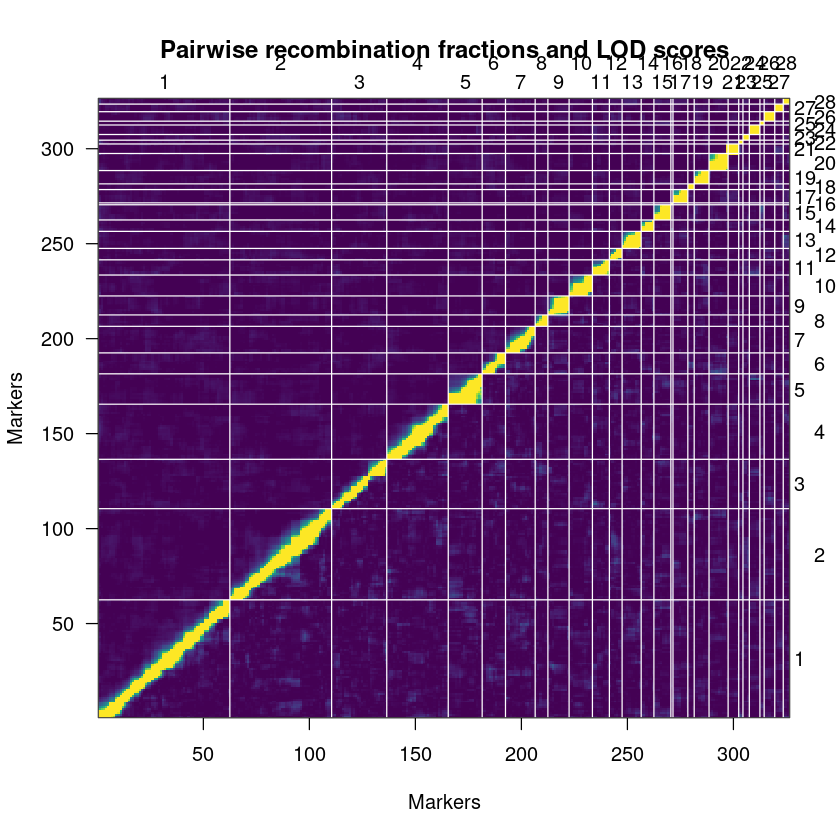

In [42]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [43]:
# maybe skip estimating the map for now?

genmap <- est.map(datf2.4, error.prob=0.005)

In [44]:
summaryMap(genmap)

,n.mar,length,ave.spacing,max.spacing
,<dbl>,<dbl>,<dbl>,<dbl>
1,62,473.1004704,7.7557454,27.5818210
2,48,349.1435339,7.4285858,27.5605892
3,26,296.6449778,11.8657991,69.7656738
4,29,190.1341765,6.7905063,18.0507432
5,16,95.7799269,6.3853285,23.4386396
6,11,81.1238381,8.1123838,26.3757290
7,14,85.2404896,6.5569607,16.2583634
8,6,36.8598531,7.3719706,12.4649419
9,10,50.6860053,5.6317784,20.5508989


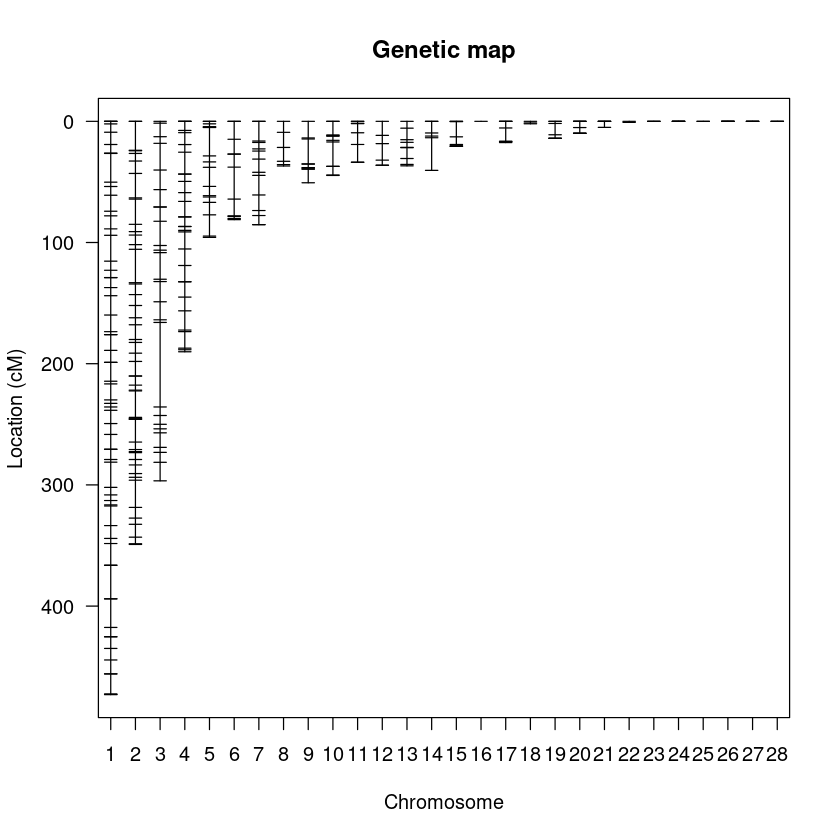

In [45]:
plotMap(genmap)

In [46]:
datf2.4 <- replace.map(datf2.4, genmap)

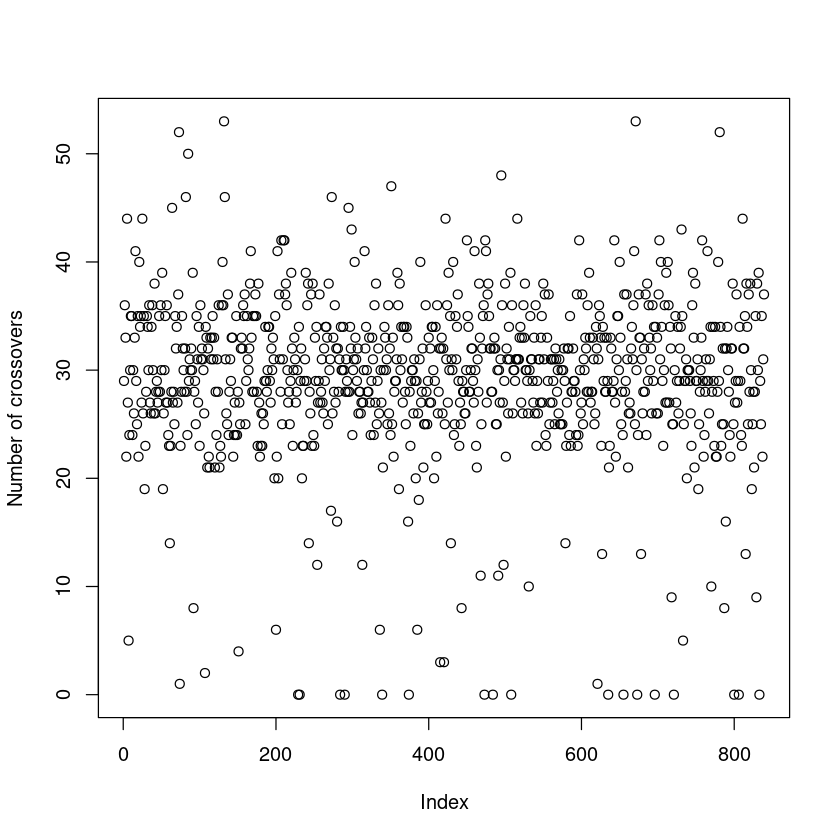

[1] 29.0739

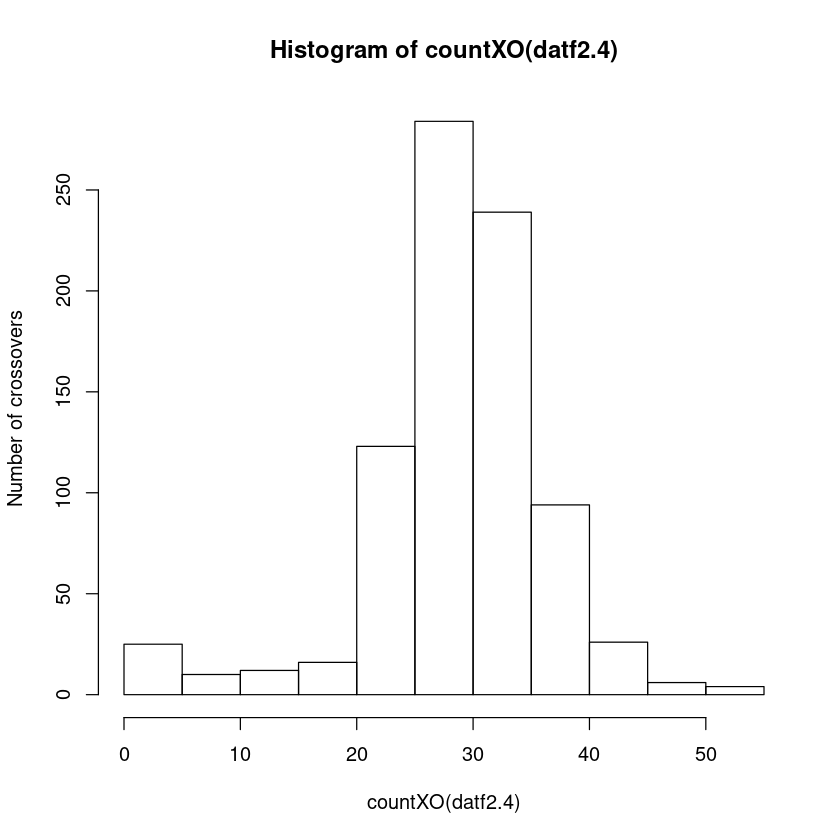

In [48]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [49]:
datf2.5 <- datf2.4

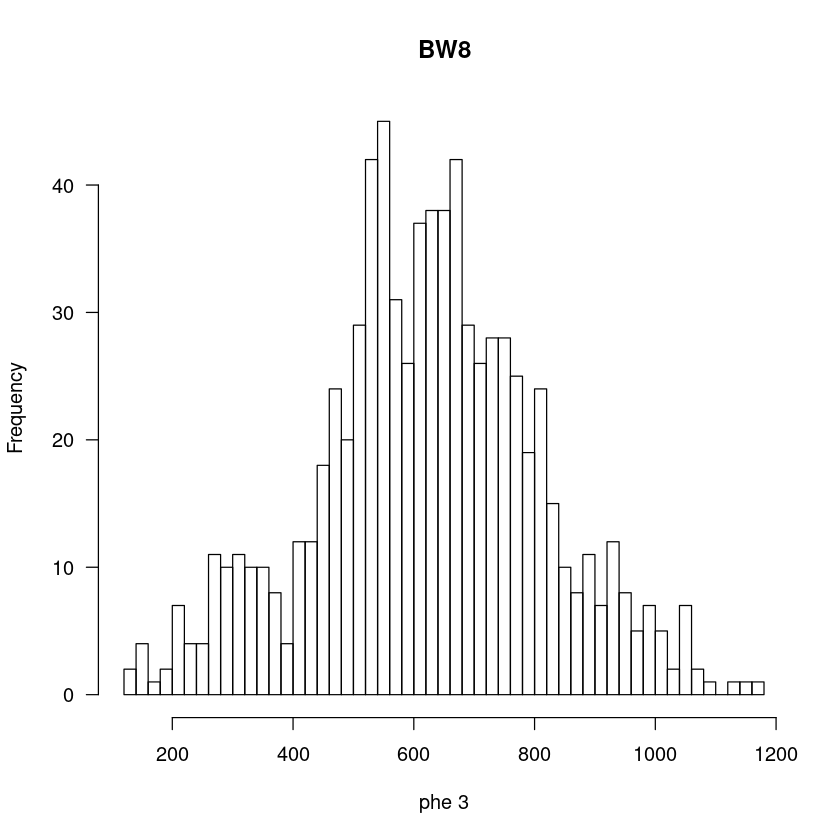

In [50]:
plotPheno(datf2.5, pheno.col=3)

In [51]:
#plotMissing(datf2.5, reorder=TRUE)

In [52]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [53]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [54]:
ac <- pull.pheno(datf2.5, c("SEX")) # only need sex since these are all f2s

In [110]:
out.hk.wbind_wb_mark <- scanone(datf2.5, pheno.col = 3, addcovar=ac, method='hk') 

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
“Dropping 55 individuals with missing phenotypes.
”


In [56]:
save.image(file = "20201119_rqtl_wahlberg_individs_wahlberg_markers.Rdata")

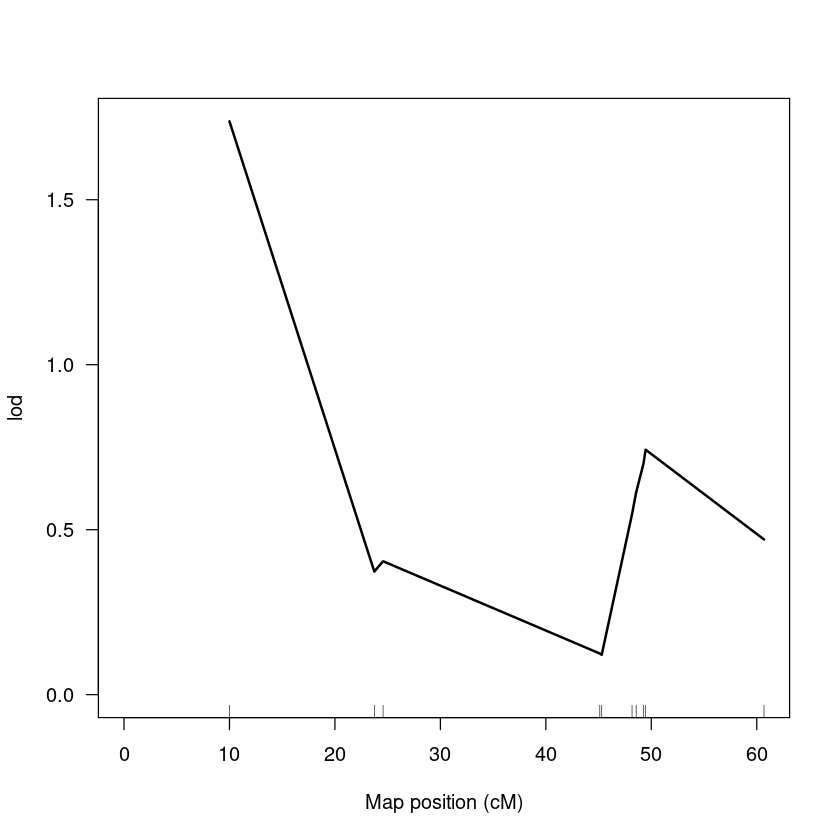

In [111]:
plot(out.hk.wbind_all_mark, chr=9)